### ***imports***



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


### **Read Data**

In [ ]:
water = pd.read_csv('/content/water_potability.csv')
water
#load our dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


### ***Pre-processing***

In [ ]:
water.shape #used to get the dimensions of the dataframe
#so we have 3276 entry and 10 columns

(3276, 10)

In [ ]:
water.info()
#used to know the Dtype and Number of non-nulls for every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
water.isnull().sum()
#used to know the number of nulls(missing values) in each column
#since the number of nulls in each column is small as we have 3276 entry so we cant drop the column or the row containing null values

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
(water.isnull().sum()*100)/water.shape[0]
#we cant drop ph , Sulfate and Trihlomathanes columns so we will replace null values with mean or median

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [ ]:
water.describe()
#getting description about the columns(max,min,std,count and Quartiles) to know if i will replace the null values with medium or mean

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
water['ph'].fillna(water['ph'].mean(),inplace = True)
water['Sulfate'].fillna(water['Sulfate'].mean(),inplace = True)
water['Trihalomethanes'].fillna(water['Trihalomethanes'].mean(),inplace = True)
#we replace all null values with mean of each column bec we cant drop the null values as the dataset is small and it will affect the train and test

In [ ]:
water['Potability'].value_counts()
#to know the number of potable and non-potable water

0    1998
1    1278
Name: Potability, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


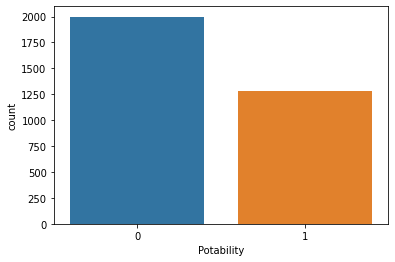

In [ ]:
sns.countplot(water['Potability'])
#to know the number of potable and non-potable water using visualization

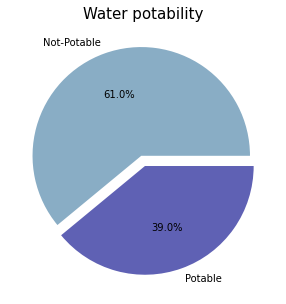

In [ ]:
labels = ['Not-Potable','Potable']
data = [water['Potability'].value_counts()[0],water['Potability'].value_counts()[1]]
figure,axis = plt.subplots(figsize = (10,5))
axis.pie(data,labels = labels,explode = [0.05]*2,autopct='%1.1f%%',colors = sns.color_palette('twilight')[0:6])
plt.title('Water potability',fontsize = 15)
plt.show()
#another way to know the percentage of potable and non-potable water in the dataset
#after using many methods to get the number of potable and non-potable water in the dataset we found that the difference between them is high.
#so the dataset is called imbalanced class dataset.
#we will use it in that way without any change.
#but if we need to improve our model we have to handle the imbalance in potability column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82e2955390>,
      dtype=object)

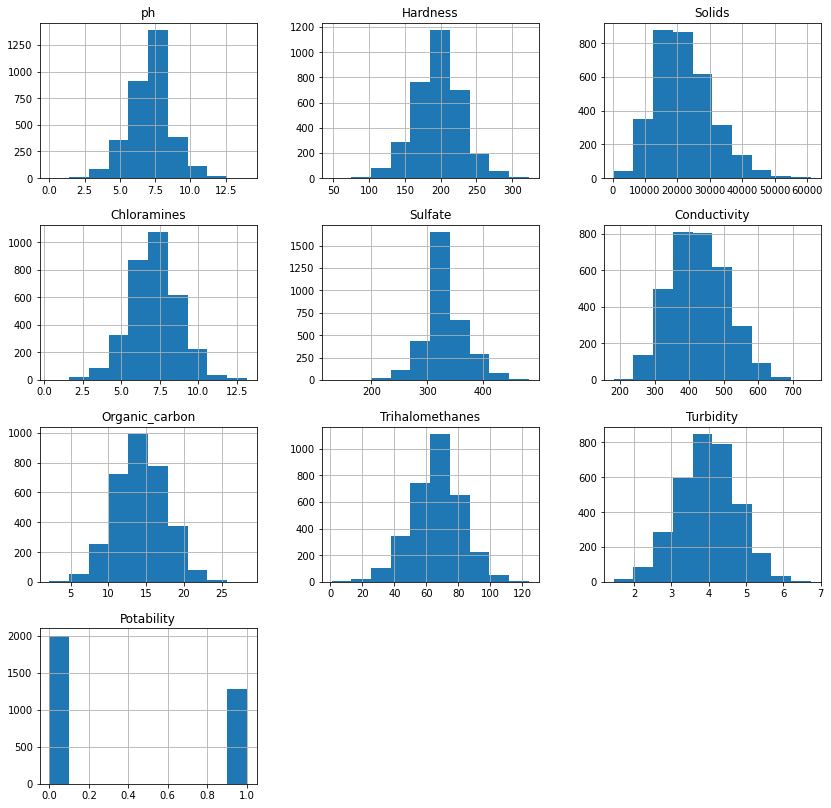

In [ ]:
water.hist(figsize = (14,14)) #get the histogram
#to see the distribution of data in each column


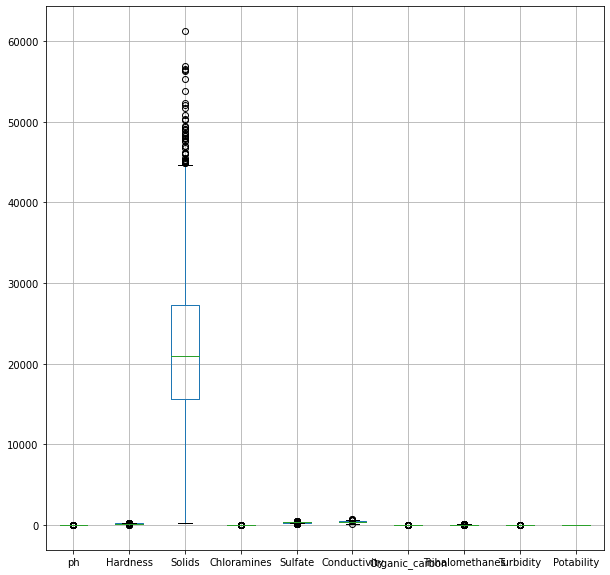

In [ ]:
water.boxplot(figsize = (10,10))
#this plot is not good bec the solids column contain large values so it doesnt give us good info about outliers. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


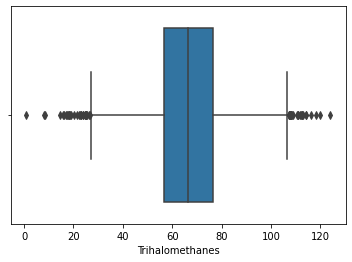

In [ ]:
sns.boxplot(water['Trihalomethanes'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


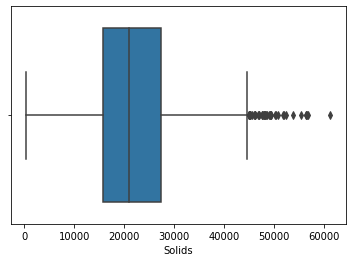

In [ ]:
sns.boxplot(water['Solids'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


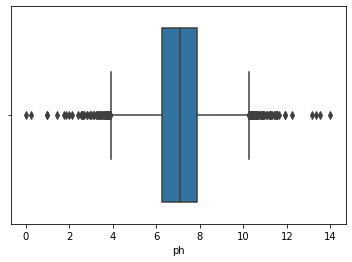

In [ ]:
sns.boxplot(water['ph'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


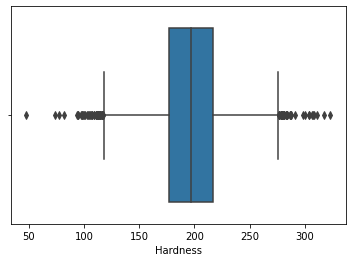

In [ ]:
sns.boxplot(water['Hardness'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


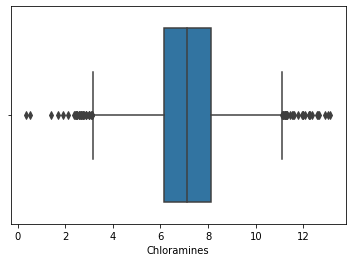

In [ ]:
sns.boxplot(water['Chloramines'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


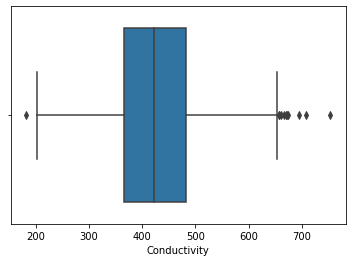

In [ ]:
sns.boxplot(water['Conductivity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


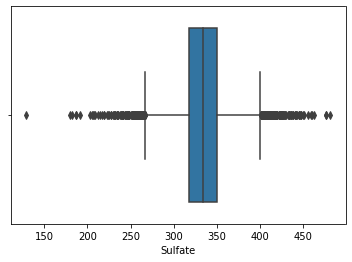

In [ ]:
sns.boxplot(water['Sulfate'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


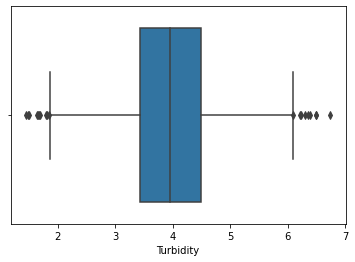

In [ ]:
sns.boxplot(water['Turbidity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


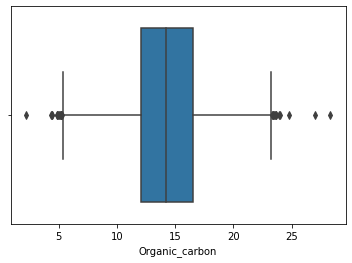

In [ ]:
sns.boxplot(water['Organic_carbon'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


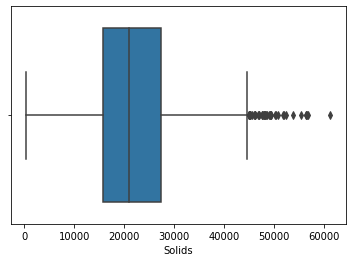

In [ ]:
sns.boxplot(water['Solids'])

In [ ]:
#from the above boxplots we see that all columns contain outliers but we will not remove it because if we tried to remove the outliers we will delete large percent of data.
#so the model will not be accurate.

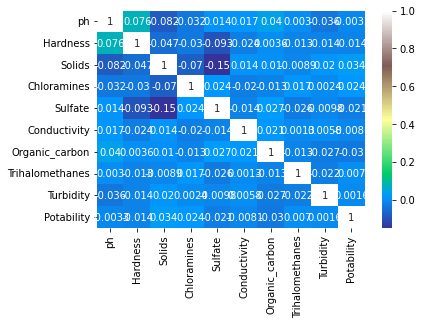

In [ ]:
sns.heatmap(water.corr(),annot = True,cmap = 'terrain')
plt.show()
#no correlation between columns so columns are independent.

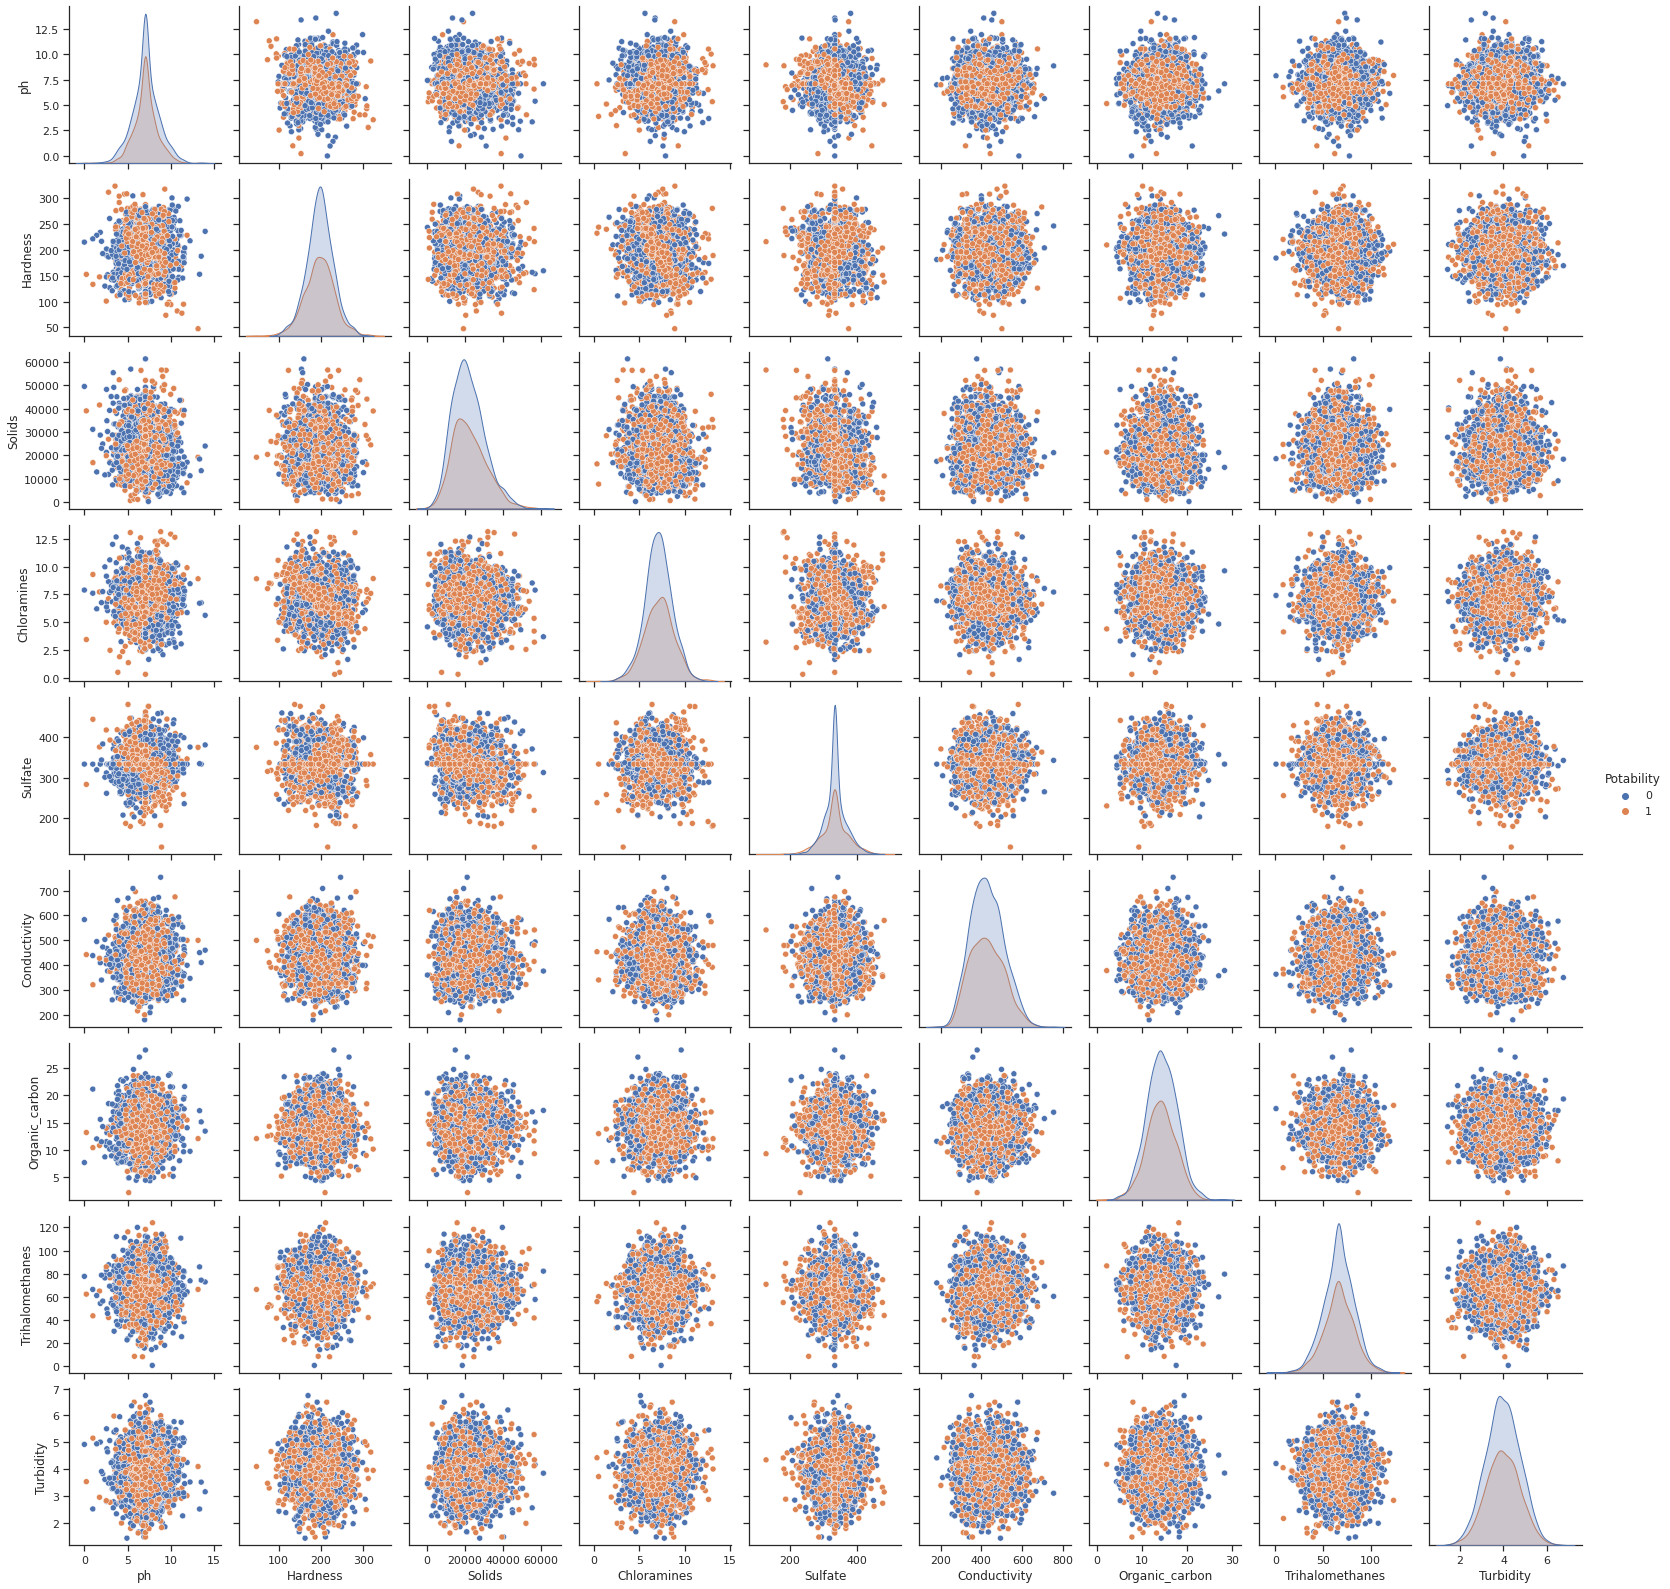

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(water, hue="Potability")
#pair plot is used to visualize the distribution of potability with respect to each column and to find the relation between each variable
#scatter plot  visualizes the relationship between a pair of variables, allowing many relationships to be explored in one chart.

In [ ]:
def ph_level(x):
    if  x <7:
        return "Acidic"
    elif x>8:
        return "Alkaline"
    else :
        return "Neutral"
water['ph_level']=water['ph'].apply(lambda x:ph_level(x))
water['ph_level']

0        Neutral
1         Acidic
2       Alkaline
3       Alkaline
4       Alkaline
          ...   
3271      Acidic
3272     Neutral
3273    Alkaline
3274      Acidic
3275     Neutral
Name: ph_level, Length: 3276, dtype: object

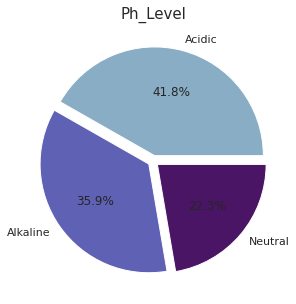

In [ ]:
labels = ['Acidic','Alkaline','Neutral']
data = [water['ph_level'].value_counts()['Acidic'],water['ph_level'].value_counts()['Neutral'],water['ph_level'].value_counts()['Alkaline']]
figure,axis = plt.subplots(figsize = (10,5))
axis.pie(data,labels = labels,explode = [0.05]*3,autopct='%1.1f%%',colors = sns.color_palette('twilight')[0:6])
plt.title('Ph_Level',fontsize = 15)
plt.show()

In [ ]:
def hardness_level(x):
    if 40 <= x <=100:
        return "first_level(40-100)"
    elif 100 < x<= 150 :
        return "seconde_level(100-150)"
    elif 150 < x <=200 :
        return "third_level(150-200)"
    elif 200 < x<=250 :
        return "fourth_level(200-250)"
    elif 250 < x<=300 :
        return "fifth_level(250-300)"
    elif x>300 :
        return "sixth_level(300<)"    
water['Hardness_level']=water['Hardness'].apply(lambda x:hardness_level(x))
water['Hardness_level']

0        fourth_level(200-250)
1       seconde_level(100-150)
2        fourth_level(200-250)
3        fourth_level(200-250)
4         third_level(150-200)
                 ...          
3271      third_level(150-200)
3272      third_level(150-200)
3273      third_level(150-200)
3274     fourth_level(200-250)
3275      third_level(150-200)
Name: Hardness_level, Length: 3276, dtype: object

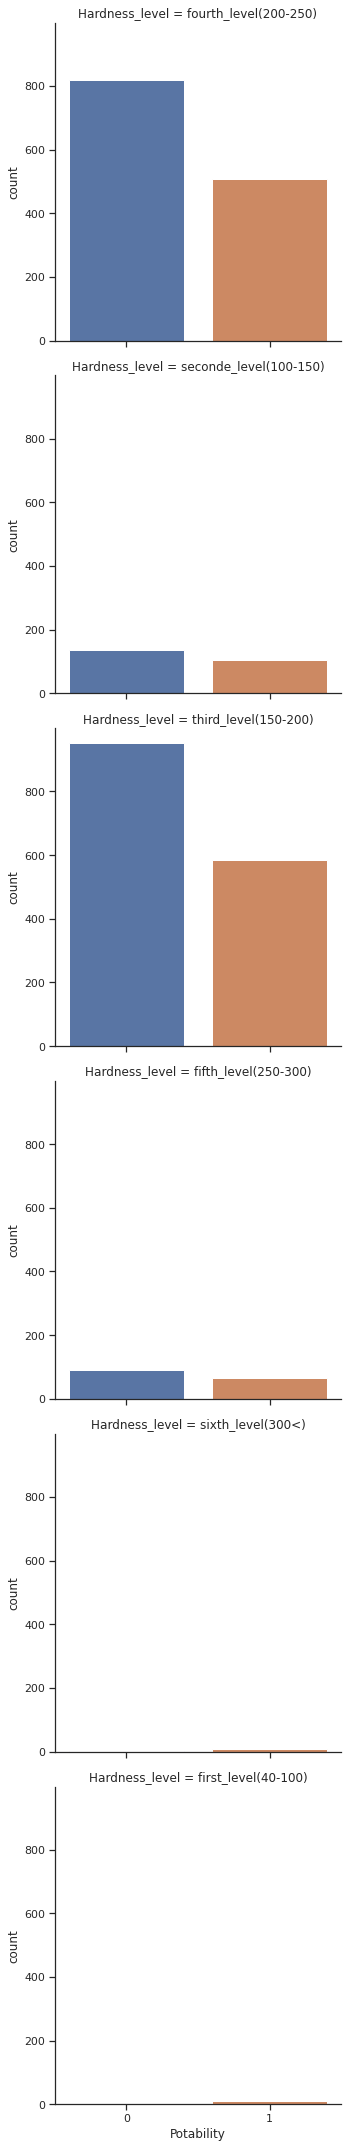

In [ ]:
sns.catplot(x='Potability',row='Hardness_level',data=water,kind='count')
#GET the potability of the water in each level of hardness

### **Models_test**

In [ ]:
labels = ['Potability','ph_level','Hardness_level']
x = water.drop(labels,axis = 1)
y = water['Potability']
#split data to x(input features),y(output)

In [ ]:
#Normalizing data by giving each value in x a range between(0,1) to make the model less sensetive to the features to get better accuracy
features_scaler = StandardScaler()
features = features_scaler.fit_transform(x)
features
#if one of the variables in the K-Nearest Neighbor, KNN, is in the 1000s and the other is in the 0.1s, the first variable will dominate the distance rather strongly. In this scenario, normalization  might be beneficial.

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [ ]:
#we try all the algorithms to see which one of them have the best accuracy
parameters_model = {
    'svm' : {
        'model':SVC(gamma= 'auto'),#gama is Kernel coefficient.(kol m yzed kol m yb2a a7sn) (1/n_features => auto) ( 1/ (n_features * X.var()) =>scale)
        'params' : {
         'C' : [1,10,20,30,40,50], # penalty parameter (kol m yb2a 2olyl kol m yb2a regularized)
         'kernel':['rbf','linear','poly'] #function that will be used to classify the data Linear(linear),non-linear(rbf,poly)

         }
    },
    'RF': {
        'model':RandomForestClassifier(),
        'params': {
            'n_estimators':[1,10,20,50,100] #number of trees
        }
        
    },
    'Logistic': { #liblinear (Algorithm) is used for small datasets like our data , Auto multiclass selects (ovr) when the classification is binary or the solver is (linear) and (multinomial) otherwise
        'model':LogisticRegression(solver = 'liblinear',multi_class= 'auto'),
        'params': {
            'C':[1,5,10] #Inverse of regularization strength
        }
    },
    'KNN': {
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[3,7,11,13] #number of neighbors to classify the point
        }
        },
    'DT': {
        'model': DecisionTreeClassifier(),
        'params': {
           'min_samples_split' : [5,10,15,20], #min samples to split a node
           'criterion' : ['gini','entropy'] #Function to measure the quality of a split
        }
    }

    
}

In [ ]:
Accuracy = [] #an empty array to store the (modelname,Accuracy of model,best parameters)
for name,mp in parameters_model.items() : #for loop used to iterate over all the models we have in (parameters_model)
  classification = GridSearchCV(mp['model'],mp['params'],cv = 5,return_train_score= False) #using GridSearch to get the best parameters for each model
  #CV: number of cross-validations(b2sm al training set l subsets w a3od a3ml train 3leha)(n Combination)
  classification.fit(features,y) #train the model
  Accuracy.append({
      'model':name, #store model name in the Accuracy array
      'best_params': classification.best_params_, #store best parameters of the model in the Accuracy array
      'best_Accuracy':classification.best_score_ #store best score of the model in the Accuracy array
  })
newdf = pd.DataFrame(Accuracy,columns = ['model','best_Accuracy','best_params']) #put the array in a new dataframe
newdf #display the dataframe


In [ ]:
#okay, now to find the best model we have to compare the accuracy and get the highest
sns.barplot(x='model',y='best_Accuracy',data = newdf)
#according to the graph the best Algorihm to use is RF

In [ ]:
#another way to find the model with highest accuracy
max_accuracy = newdf['best_Accuracy'].argmax()
newdf.loc[[max_accuracy]]
#another way to determine the Algorithm with best accuracy

### **Random Forest**

In [ ]:
#after we choose the Random Forest algorithm we will now do the following steps:
# 1)split the dataframe into train(to train the model) and test(to make the model predict and see the accuracy)
# 2)Train the model on the train data (x_train,y_train)
# 3)predict the score of test data to get the accuracy of the model (x_test,y_test)
# 4)compute the confusion matrix to see the (TP,TN,FP,FN)
# 5)compute the classification report to see the (recall,accuracy,precision,etc...) 

In [ ]:

X_train,X_test,Y_train,Y_test = train_test_split(features,y,test_size=0.25 ,random_state= 101)
#split the data into train and test 
#step:1

In [ ]:
RF = RandomForestClassifier(n_estimators=50)
RF.fit(X_train,Y_train)
#step:2
y_predict = RF.predict(X_test)
Test_Accuracy = RF.score(X_test,Y_test)
Error = (1-Test_Accuracy)*100
print("Test_Accuracy: ",Test_Accuracy*100)
print("Error percentage: ",Error)
#step:3


In [ ]:
cm = confusion_matrix(Y_test,y_predict)
sns.heatmap(cm,annot=True,fmt=".1f")
#step:4
#TP (True positive)  : when a case was positive and predicted positive
#TN (True Negative)  : when a case was negative and predicted negative
#FN (False Negative) : when a case was positive but predicted negative
#FP (False Positive) : when a case was negative but predicted positive

In [ ]:
#step:5
#we will use the classification report to measure the quality of the predections
print(classification_report(Y_test,y_predict))
#precision : Accuracy of positive predictions ( Precision is how good the model is at predicting a specific category.)
#recall : Fraction of positives that were correctly identified (Recall tells you how many times the model was able to detect a specific category)
#f1-score : percent of correct positive predections (rate performance)

### **Improve Accuracy**

In [ ]:
#as we said above the dataset is called imbalanced classification dataset
#so the accuracy we got(0.68) is not the best accuracy we can get
#to improve the Accuracy we need to balance the potability column to convert the dataset to balanced classification dataset

In [ ]:
#now we need to improve the accuracy by handling the imbalance in potability column
from imblearn.over_sampling import SMOTE #Synthetic Minority Oversampling Technique
smote = SMOTE(sampling_strategy='minority') 
x_new, y_new = smote.fit_resample(features, y)

print(y_new.value_counts())
sns.countplot(y_new)

#after we handled the potability column lets choose the best model again then get the model accuracy

In [ ]:
#we try all the algorithms to see which one of them have the best accuracy
parameters_model = {
    'svm' : {
        'model':SVC(gamma= 'auto'),#gama is for non-linear hyperplanes.(kol m yzed kol m yb2a a7sn) 
        'params' : {
         'C' : [1,10,20,30,40,50], #penalty parameter
         'kernel':['rbf','linear','poly'] #function that will be used to classify the data Linear(linear),non-linear(rbf,poly)

         }
    },
    'RF': {
        'model':RandomForestClassifier(),
        'params': {
            'n_estimators':[1,10,20,50,100] #number of trees in the forest
        }
        
    },
    'Logistic': { #liblinear is used for small datasets like our data , Auto multiclass selects (ovr) when the classification is binary or the solver is (linear) and (multinomial) otherwise
        'model':LogisticRegression(solver = 'liblinear',multi_class= 'auto'),
        'params': {
            'C':[1,5,10] #Inverse of regularization strength
        }
    },
    'KNN': {
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[3,7,11,13] #number of neighbors to classify the point
        }

    },
     'DT': {
        'model': DecisionTreeClassifier(),
        'params': {
           'min_samples_split' : [5,10,15,20], #min samples to split a node
           'criterion' : ['gini','entropy'] #Function to measure the quality of a split
        }
    }

    
}


In [ ]:
Accuracy = [] #an empty array to store the (modelname,Accuracy of model,best parameters)
for name,mp in parameters_model.items() : #for loop used to iterate over all the models we have in (parameters_model)
  classification = GridSearchCV(mp['model'],mp['params'],cv = 5,return_train_score= False) #using GridSearch to get the best parameters for each model
  classification.fit(x_new,y_new) #train the model
  Accuracy.append({
      'model':name, #store model name in the Accuracy array
      'best_params': classification.best_params_, #store best parameters of the model in the Accuracy array
      'best_Accuracy':classification.best_score_ #store best score of the model in the Accuracy array
  })
improve = pd.DataFrame(Accuracy,columns = ['model','best_Accuracy','best_params']) #put the array in a new dataframe
improve

In [ ]:
#now to find the best model we have to compare the accuracy and get the highest
sns.barplot(x='model',y='best_Accuracy',data = improve)
#according to the graph the best Algorihm to use is RF

In [ ]:
max_accuracy = improve['best_Accuracy'].argmax()
improve.loc[[max_accuracy]]
#so the best model is Random forest

In [ ]:
#lets repeat the five steps  after we choose the Random Forest algorithm 
# 1)split the dataframe into train(to train the model) and test(to make the model predict and see the accuracy)
# 2)Train the model on the train data (x_train,y_train)
# 3)predict the score of test data to get the accuracy of the model (x_test,y_test)
# 4)compute the confusion matrix to see the (TP,TN,FP,FN)
# 5)compute the classification report to see the (recall,accuracy,precision,etc...) 

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x_new,y_new,test_size=0.25 ,random_state= 101)
#split the data into train and test 
#step:1

In [ ]:
#lets train the model and get the Test accuracy
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train,Y_train)
#step:2
y_predict = RF.predict(X_test)
Test_Accuracy = RF.score(X_test,Y_test)
Error = (1-Test_Accuracy)*100
print("Test_Accuracy: ",Test_Accuracy*100)
print("Error percentage: ",Error)
#step:3

In [ ]:
cm = confusion_matrix(Y_test,y_predict)
sns.heatmap(cm,annot = True,fmt=".1f")
#step:4
#TP (True positive)  : when a case was positive and predicted positive
#TN (True Negative)  : when a case was negative and predicted negative
#FN (False Negative) : when a case was positive but predicted negative
#FP (False Positive) : when a case was negative but predicted positive

In [ ]:
#step:5
#we will use the classification report to measure the quality of the predections
print(classification_report(Y_test,y_predict))
#precision : Accuracy of positive predictions ( Precision is how good the model is at predicting a specific category.)
#recall : Fraction of positives that were correctly identified (Recall tells you how many times the model was able to detect a specific category)
#f1-score : percent of correct positive predections (rate performance)

## **Conclusion : after using the SMOTE method to balance the dataset so the f1-score of potability (1) changed from 0.46 to 0.75 so the percent of correct positive predections increased,also by using the SMOTE to balance the dataset the accuracy of the test set and training set increased.**